<a href="https://colab.research.google.com/github/yaashi12/ExcelExamples/blob/master/Visualizationofdataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Description of the dataset :
The dataset was released.The study is primarily limited only to students with engineering disciplines.The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills.The dataset also contains demographic features. The dataset contains around 40 independent variables and 4000 data points.The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.

## Import Libraries

In [1]:
#@title Default title text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## Loading Dataset.

In [2]:
from google.colab import files
uploaded=files.upload()

Saving aspiring_minds_employability_outcomes_2015.xlsx to aspiring_minds_employability_outcomes_2015.xlsx


In [3]:
import io
df=pd.read_excel(io.BytesIO(uploaded['aspiring_minds_employability_outcomes_2015.xlsx']))
df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [4]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [5]:
df.shape

(3998, 39)

In [6]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


## Observation:
### There is lot of imbalance in the dataset as we can observe:
* The scales of collegeGPA are different.
* There is some right skewness is salary distribution as there is difference between mean and median of salary.
*  Columns like ID, collegeID,collegeTier,collegeCityID,CollegeCityTier doestn't making any sense to measure them.
* lots of impurity in some columns i.e they contain (nan,-1) values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [8]:
#dropping the unnecessary columns

df.drop(['Unnamed: 0','ID','CollegeID','CollegeCityID'], axis=1, inplace=True)

In [9]:
df.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

## Univariate Analysis & Bivariate Analysis
* After doing some fundamental let's explore some more about each features.

In [10]:
numerical_feature=df[['Salary','10percentage','12percentage','collegeGPA']]

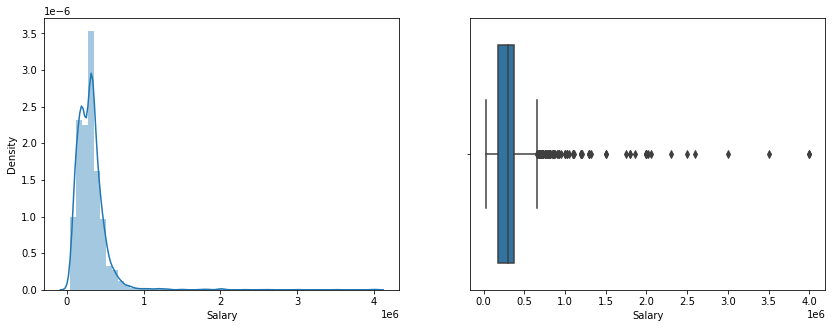

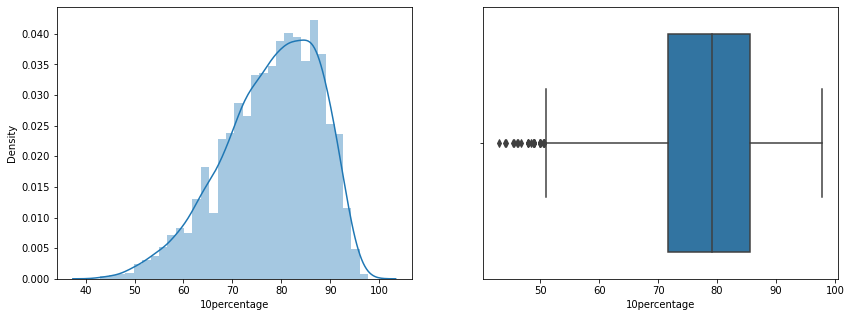

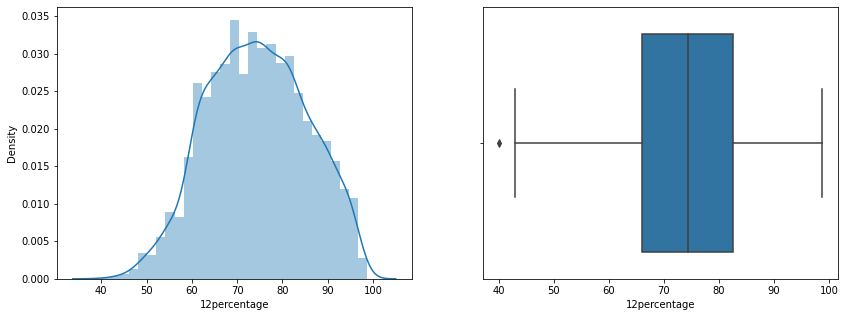

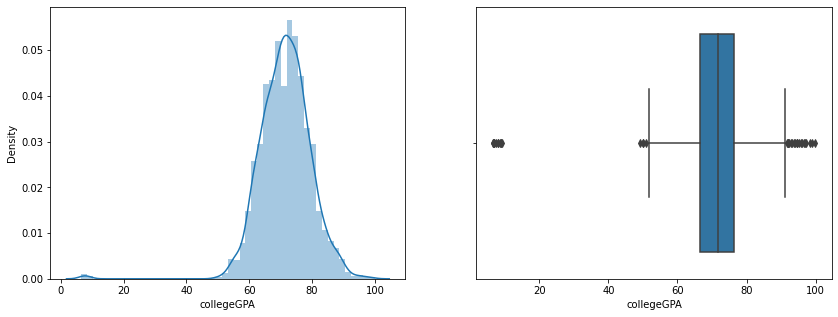

In [11]:
for col in numerical_feature.columns:
    plt.figure(figsize=(14,5))
    plt.subplot(121)
    sns.distplot(numerical_feature[col])
    
    plt.subplot(122)
    sns.boxplot(numerical_feature[col])
    
    

## Observation :
#### Salary  : 
* Salary of employees is not normally distributed i.e there is a right skewness in salary as there are outliers exist The dataset and the kurtosis is very high as mostly employees got there starting package of Rs 300000.

#### 10percentage  : 
* Data is left skewed as some candidates didn't perform well in 10th standerd which impacts average score of all canditates i.e reduces the average scores as seen above mean= 77.92% & Median= 79.15%, Most of the students score around 79% marks.

#### 12percentage : 
* Data is almost normally distributed

#### collegeGPA : 
* Distribution of college GPA is approximately normal and most of students scored 71.7% in college

mean markes scored  285447.1586526099
median markes scored 300000.0




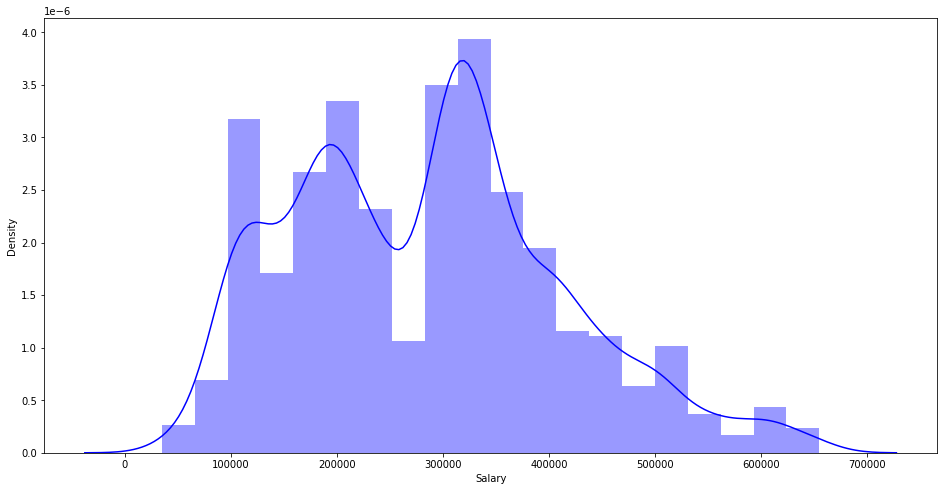

In [12]:
Q1=df['Salary'].quantile(0.25)
Q2=df['Salary'].quantile(0.5)
Q3=df['Salary'].quantile(0.75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
df=df[df['Salary']<=UL]

print('mean markes scored ',df['Salary'].mean())
print('median markes scored',df['Salary'].median())

print()


print()

plt.figure(figsize=(16,8))
sns.distplot(df['Salary'],bins=20, kde=True,hist=True, color='blue')
plt.show()

In [13]:
designation_count = df['Designation'].value_counts()
designation_count

software engineer           525
software developer          263
system engineer             205
programmer analyst          139
systems engineer            116
                           ... 
desktop support engineer      1
cad drafter                   1
noc engineer                  1
human resources intern        1
jr. software developer        1
Name: Designation, Length: 416, dtype: int64

In [14]:
# Taking the most frequent designation
designation_count[:15]

software engineer             525
software developer            263
system engineer               205
programmer analyst            139
systems engineer              116
java software engineer        110
software test engineer         97
project engineer               77
technical support engineer     74
java developer                 67
senior software engineer       60
test engineer                  57
web developer                  54
network engineer               51
application developer          49
Name: Designation, dtype: int64

Text(0.5, 1.0, 'Job Designation of a CSE Fresher')

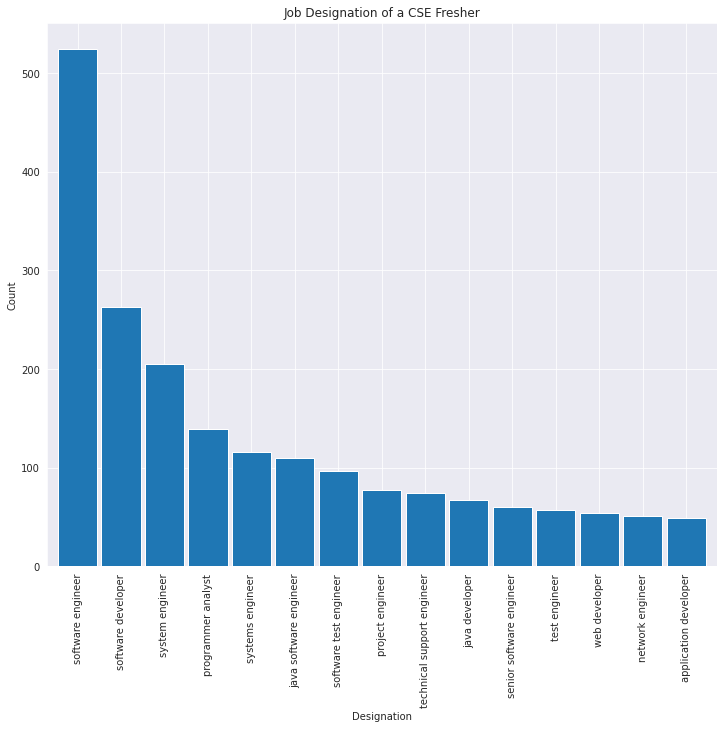

In [15]:
#Plotting the most frequent designation
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
designation_count[:15].plot(kind='bar' , width=0.9)
plt.xlabel('Designation')
plt.ylabel('Count')
plt.title('Job Designation of a CSE Fresher')

In [16]:
jobcities_count = df['JobCity'].value_counts()
jobcities_count

Bangalore           603
-1                  452
Noida               357
Hyderabad           329
Pune                284
                   ... 
india                 1
Asansol               1
Tirunelvelli          1
Ernakulam             1
Asifabadbanglore      1
Name: JobCity, Length: 327, dtype: int64

In [17]:
df['JobCity'].replace(-1,np.nan,inplace=True)
df['JobCity'].dropna(inplace=True)
jobcities_count = df['JobCity'].value_counts()
jobcities_count

Bangalore           603
Noida               357
Hyderabad           329
Pune                284
Chennai             271
                   ... 
Ranchi                1
Punchkula             1
indore                1
Salem                 1
Asifabadbanglore      1
Name: JobCity, Length: 326, dtype: int64

In [18]:
# Taking the most frequent cities that a candidate choose to work
jobcities_count[:10]

Bangalore    603
Noida        357
Hyderabad    329
Pune         284
Chennai      271
New Delhi    191
Gurgaon      189
Mumbai       106
Kolkata       98
Jaipur        45
Name: JobCity, dtype: int64

Text(0.5, 1.0, 'Preferred Cities')

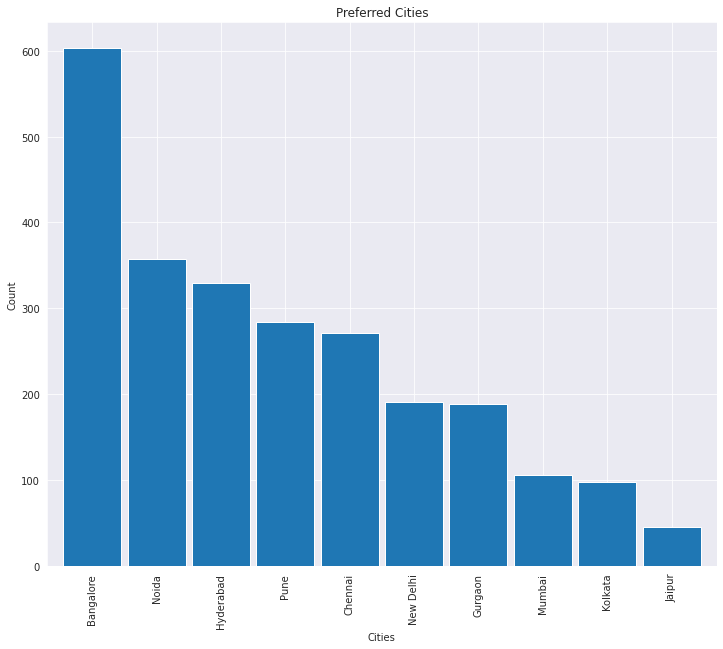

In [19]:
#Plotting the most frequent cities
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
jobcities_count[:10].plot(kind='bar' , width=0.9)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.title('Preferred Cities')

In [20]:
categorical_feature=df[['Gender','CollegeTier','CollegeCityTier','Degree']]

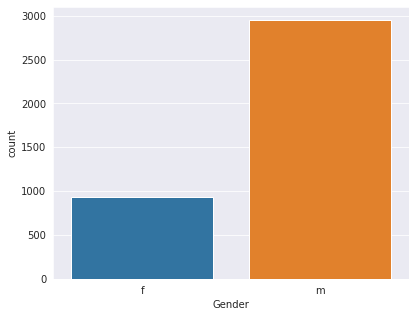

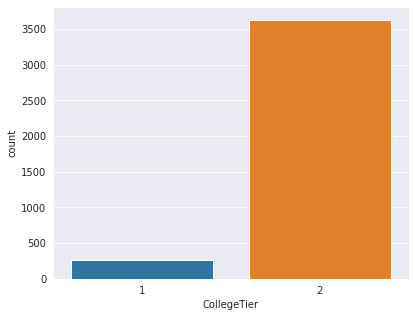

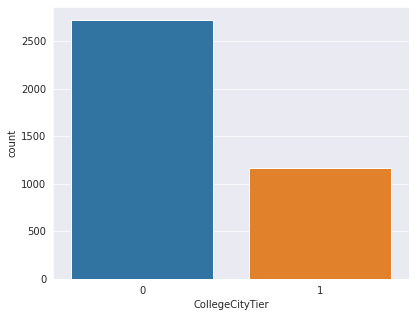

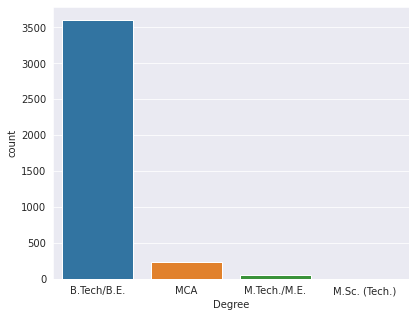

In [21]:
for col in categorical_feature.columns:
    plt.figure(figsize=(14,5))
    plt.subplot(121)
    sns.countplot(categorical_feature[col])
    
    

#### Degree:
* we can say that most of the candidates are from B.Tech/B.E

#### Gender:
* we can say that there are more male candidates than female

#### College Tier :
* Students from college Tier 2 are higher in number

The number of unique element present in Specialization is : 45




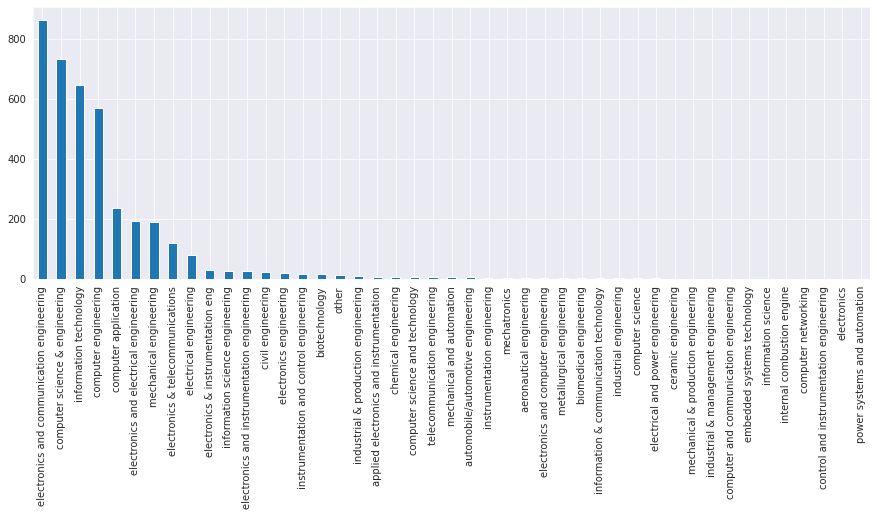

In [22]:
print(f'The number of unique element present in Specialization is : {df.Specialization.nunique()}')
print('\n')
specialization_freq = df['Specialization'].value_counts()
specialization_freq.plot(kind = 'bar', figsize = (15, 5),grid = True)
plt.show()

### Observation:
* There are 46 specialization classes but the names of some classes seems similar and some of them have very few records
* so we are making groups of similar specialization classes and put some of them in other specialization as they have very few records.
### Group names:
* EC = Electronic and Communication
* CS = Computer Science
* other = All other specializations

The unique element present in the Specilaation :  ['CS' 'EC' 'other']

The count of each element : 
  CS       2226
EC       1295
other     368
Name: Specialization, dtype: int64


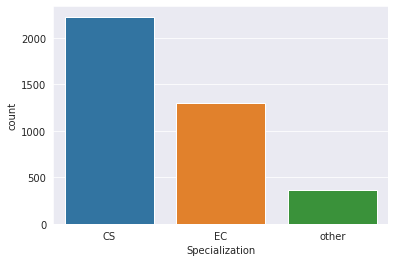

In [23]:
specialization_group =\
{'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'other',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'other',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'other',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'other',
 'automobile/automotive engineering' : 'other',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'other',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'other',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'other',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'other',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'other',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'other',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}

 
df['Specialization'] = df['Specialization'].map(specialization_group)

print('The unique element present in the Specilaation : ', str(df['Specialization'].unique()))
print()
print('The count of each element : \n ', str(df['Specialization'].value_counts()))
sns.countplot(df['Specialization'])

plt.show()

In [24]:
print(f'The number of unique element present in Designation is : {df.Designation.nunique()}')

The number of unique element present in Designation is : 416


In [25]:
#Filtering designation

l=[]
for i in df['Designation']:
    if ('senior' in i and 'engineer' not in i):
        l.append('senior')
    elif('trainee'in i and 'engineer' not in i):
        l.append('trainee')
    elif('engineer' in i and 'senior' not in i):
        l.append('engineer')
    elif('associate' in i and 'senior' not in i):
        l.append('associate')
    elif('developer' in i and 'senior' not in i):
        l.append('developer')
    elif('manager' in i and 'senior' not in i):
        l.append('manager')
    elif('analyst' in i):
        l.append('analyst')
    elif('consultant' in i):
        l.append('consultant')
    elif('executive' in i):
        l.append('executive')
    elif('designer' in i):
        l.append('designer')
    else:
        l.append('others')

engineer      1953
developer      661
others         511
analyst        392
manager        111
associate       65
executive       62
trainee         57
senior          36
designer        22
consultant      19
Name: Designations, dtype: int64



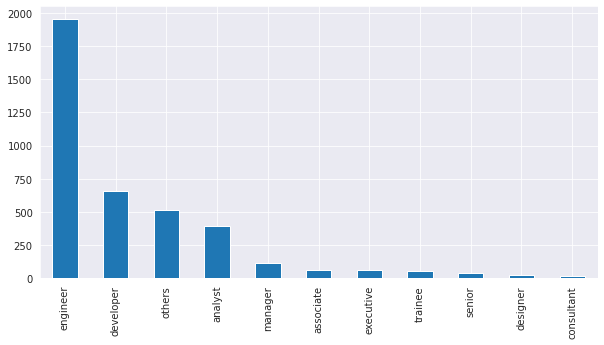

In [26]:
df['Designations']=l
plt.figure(figsize=(10,5))
print(df['Designations'].value_counts())
print()
df['Designations'].value_counts().plot(kind='bar', grid=True)
plt.show()

In [27]:
df['12board'].replace(to_replace = 0, value = 'cbse', inplace = True)

In [28]:
print(df['12board'].value_counts())

cbse                                                            1703
state board                                                     1241
icse                                                             127
up board                                                          83
isc                                                               39
                                                                ... 
stjoseph of cluny matrhrsecschool,neyveli,cuddalore district       1
scte and vt ,orissa                                                1
hbsc                                                               1
jawahar higher secondary school                                    1
boardofintermediate                                                1
Name: 12board, Length: 329, dtype: int64


In [29]:
state_board_list=['board of intermediate education,ap', 'state board',
       'mp board',  'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate state board', 'stateboard', 'hsc',
       'electonincs and communication(dote)', 'karnataka pu board',
       'government polytechnic mumbai , mumbai board', 'pu board',
       'baord of intermediate education', 'apbie', 'andhra board',
       'tamilnadu stateboard',
       'west bengal council of higher secondary education',
       'cbse,new delhi', 'u p board', 'intermediate', 'biec,patna',
       'diploma in engg (e &tc) tilak maharashtra vidayapeeth',
       'hsc pune', 'pu board karnataka', 'kerala', 'gsheb',
       'up(allahabad)', 'nagpur', 'st joseph hr sec school',
       'pre university board', 'ipe', 'maharashtra', 'kea', 'apsb',
       'himachal pradesh board of school education', 'staae board',
       'international baccalaureate (ib) diploma', 'nios',
       'karnataka board of university',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'scte vt orissa', 'matriculation',
       'department of pre-university education', 'wbscte',
       'preuniversity board(karnataka)', 'jharkhand accademic council',
       'bieap', 'msbte (diploma in computer technology)',
       'jharkhand acamedic council (ranchi)',
       'department of pre-university eduction', 'biec',
       'sjrcw', ' board of intermediate', 'msbte',
       'sri sankara vidyalaya', 'chse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'state board of technical eduction panchkula', 'upbhsie', 'apbsc',
       'state board of technical education and training',
       'secondary board of rajasthan',
       'tamilnadu higher secondary education board',
       'jharkhand academic council',
       'board of intermediate education,hyderabad', 'up baord', 'pu',
       'dte', 'board of secondary education', 'pre-university',
       'board of intermediate education,andhra pradesh',
       'up board , allahabad', 'srv girls higher sec school,rasipuram',
       'intermediate board of education,andhra pradesh',
       'intermediate board examination',
       'department of pre-university education, bangalore',
       'stmiras college for girls', 'mbose',
       'department of pre-university education(government of karnataka)',
       'dpue', 'msbte pune', 'board of school education harayana',
       'sbte, jharkhand', 'bihar intermediate education council, patna',
       'higher secondary', 's j polytechnic', 'latur',
       'board of secondary education, rajasthan', 'jyoti nivas', 'pseb',
       'biec-patna', 'board of intermediate education,andra pradesh',
       'chse,orissa', 'pre-university board', 'mp', 'intermediate board',
       'govt of karnataka department of pre-university education',
       'karnataka education board',
       'board of secondary school of education', 'pu board ,karnataka',
       'karnataka secondary education board', 'karnataka sslc',
       'board of intermediate ap', 'u p', 'state board of karnataka',
       'directorate of technical education,banglore', 'matric board',
       'andhpradesh board of intermediate education',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'bte up', 'scte and vt ,orissa', 'hbsc',
       'jawahar higher secondary school', 'nagpur board', 'bsemp',
       'board of intermediate education, andhra pradesh',
       'board of higher secondary orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of intermediate education:ap,hyderabad', 'science college',
       'karnatak pu board', 'aissce', 'pre university board of karnataka',
       'bihar', 'kerala state board', 'uo board', 
       'karnataka board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'jaycee matriculation school',
       'board of higher secondary examination, kerala',
       'uttaranchal state board', 'intermidiate', 'bciec,patna', 'bice',
       'karnataka state', 'state broad', 'wbbhse', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'gseb/technical education board', 'msbshse,pune',
       'tamilnadu state board', 'board of technical education',
       'kerala university', 'uttaranchal shiksha avam pariksha parishad',
       'chse(concil of higher secondary education)',
       'bright way college, (up board)', 'board of intermidiate',
       'higher secondary state certificate', 'karanataka secondary board',
       'maharashtra board', 'cgbse', 'diploma in computers', 'bte,delhi',
       'rajasthan board ajmer', 'mpbse', 'pune board',
       'state board of technical education', 'gshseb',
       'amravati divisional board', 'dote (diploma - computer engg)',
       'karnataka pre-university board', 'jharkhand board',
       'punjab state board of technical education & industrial training',
       'department of technical education',
       'sri chaitanya junior kalasala', 'state board (jac, ranchi)',
       'aligarh muslim university', 'tamil nadu state board', 'hse',
       'karnataka secondary education', 'state board ',
       'karnataka pre unversity board',
       'ks rangasamy institute of technology',
       'karnataka board secondary education', 'narayana junior college',
       'bteup', 'board of intermediate(bie)', 'hsc maharashtra board',
       'tamil nadu state', 'uttrakhand board', 'psbte',
       'stateboard/tamil nadu', 'intermediate council patna',
       'technical board, punchkula', 'board of intermidiate examination',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ap board', 'nashik board', 'himachal pradesh board',
       'maharashtra satate board',
       'andhra pradesh board of secondary education',
       'tamil nadu polytechnic',
       'maharashtra state board mumbai divisional board',
       'department of pre university education',
       'dav public school,hehal', 'board of intermediate education, ap',
       'rajasthan board of secondary education',
       'department of technical education, bangalore', 'chse,odisha',
       'maharashtra nasik board',
       'west bengal council of higher secondary examination (wbchse)',
       'holy cross matriculation hr sec school', 'cbsc',
       'pu  board karnataka', 'biec patna', 'kolhapur', 'bseb, patna',
       'up board allahabad', 'nagpur board,nagpur', 'diploma(msbte)',
       'dav public school', 'pre university board, karnataka',
       'ssm srsecschool', 'state bord', 'jstb,jharkhand',
       'intermediate board of education', 'mp board bhopal', 'pub',
       'madhya pradesh board', 'bihar intermediate education council',
       'west bengal council of higher secondary eucation',
        'mpc',
       'certificate for higher secondary education (chse)orissa',
       'maharashtra state board for hsc',
       'board of intermeadiate education', 'latur board',
       'andhra pradesh', 'karnataka pre-university',
       'lucknow public college', 'nagpur divisional board',
       'ap intermediate board', 'cgbse raipur', 'uttranchal board',
       'jiec', 
       'bihar school examination board patna',
       'state board of technical education harayana', 'mp-bse',
       'up bourd', 'dav public school sec 14',
       'haryana state board of technical education chandigarh',
       'council for indian school certificate examination',
       'jaswant modern school', 'madhya pradesh open school',
       'aurangabad board', 'j&k state board of school education',
       'diploma ( maharashtra state board of technical education)',
       'board of technicaleducation ,delhi',
       'maharashtra state boar of secondary and higher secondary education',
       'hslc (tamil nadu state board)',
       'karnataka state examination board', 'puboard', 'nasik',
       'west bengal board of higher secondary education',
       'up board,allahabad', 'board of intrmediate education,ap', 
       'karnataka state pre- university board',
       'state board - west bengal council of higher secondary education : wbchse',
       'maharashtra state board of secondary & higher secondary education',
       'biec, patna', 'state syllabus', 'cbse board', 'scte&vt',
       'board of intermediate,ap',
       'secnior secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)',
       'board of intermidiate education,ap',
       'board of high school and intermediate education uttarpradesh',
       'higher secondary education',
       'board fo intermediate education, ap', 'intermedite',
       'ap board for intermediate education', 'ahsec',
       'punjab state board of technical education & industrial training, chandigarh',
       'state board - tamilnadu', 'jharkhand acedemic council',
       'scte & vt (diploma)', 'karnataka pu',
       'board of intmediate education ap', 'up-board',
       'boardofintermediate','andhra pradesh state board',
       'up bord', 'gujarat board', 'intermideate','west bengal state council of technical education'
       'ghseb']

state    2013
cbse     1706
icse      170
Name: 12board, dtype: int64


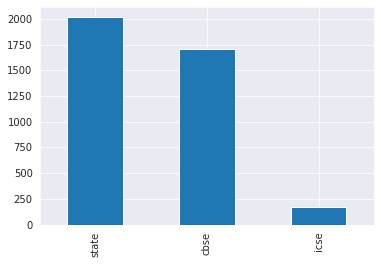

In [30]:
# dividing 12board column in 4 groups : 'state','cbse','icse' and 'n/a'
for i in state_board_list:
    df['12board'].replace(i,'state',inplace=True)

replace_list_cbse=['cbse', 
       'all india board', 
       'central board of secondary education, new delhi', 'cbese']
for i in replace_list_cbse:
    df['12board'].replace(i,'cbse',inplace=True)

replace_list_icse=[ 'isc', 'icse', 'isc board', 'isce', 'cicse',
       'isc board , new delhi']
for i in replace_list_icse:
    df['12board'].replace(i,'icse',inplace=True)

df['12board'].replace(0,'n/a',inplace=True)
df['12board'].unique()
print(df['12board'].value_counts())
df['12board'].value_counts().plot(kind='bar')

In [31]:
df['10board'].value_counts()

cbse                          1354
state board                   1154
0                              334
icse                           268
ssc                            118
                              ... 
national public school           1
nagpur board                     1
jharkhand academic council       1
bsemp                            1
bse,odisha                       1
Name: 10board, Length: 268, dtype: int64

In [32]:
# replacing 0 with state baord as it is most frequent in 10board after dividing salary in 3 parts as menctioned above

df['10board'].replace(to_replace = 0, value = 'state board', inplace = True)

In [33]:
state_board_list=['board ofsecondary education,ap', 'state board',
       'mp board bhopal','cbsc' ,
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
        'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'matric board',
       'board of secondary education',
       'west bengal board of secondary education',
       'jharkhand secondary examination board,ranchi', 'u p board',
       'bseb,patna', 'hsc', 'bse', 'sss pune',
       'karnataka education board (keeb)', 'kerala',
       'state board of secondary education( ssc)', 'gsheb',
       'up(allahabad)', 'nagpur', 'don bosco maatriculation school',
       'karnataka state secondary education board', 'maharashtra',
       'karnataka secondary education board',
       'himachal pradesh board of school education',
       'certificate of middle years program of ib',
       'karnataka board of secondary education',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'board of secendary education orissa',
       'karantaka secondary education and examination borad', 'hbsc',
       'kseeb(karnataka secondary education examination board)',
       'hbse', 'state(karnataka board)',
       'jharkhand accademic council',
       'jharkhand secondary examination board (ranchi)',
       'karnataka secondary education examination board', 'delhi board',
       'mirza ahmed ali baig', 'jseb', 'bse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'upbhsie', 'secondary board of rajasthan',
       'tamilnadu matriculation board', 'jharkhand secondary board',
       'board of secondary education,andhara pradesh', 'up baord',
       'state', 'board of intermediate education',
       'state board of secondary education,andhra pradesh',
       'up board , allahabad',
       'stjosephs girls higher sec school,dindigul', 'maharashtra board',
       'education board of kerala', 'board of ssc',
       'maharashtra state board pune',
       'board of school education harayana',
       'secondary school cerfificate', 'maharashtra sate board', 'ksseb',
       'bihar examination board, patna', 'latur',
       'board of secondary education, rajasthan', 'state borad hp',
       'cluny', 'bsepatna', 'up borad', 'ssc board of andrapradesh',
       'matric', 'bse,orissa', 'ssc-andhra pradesh', 'mp',
       'karnataka education board', 'mhsbse',
       'karnataka sslc board bangalore', 'karnataka', 'u p',
       'secondary school of education', 'state board of karnataka',
       'karnataka secondary board', 'andhra pradesh board ssc',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'hse,orissa', 'national public school', 'nagpur board',
       'jharkhand academic council', 'bsemp',
       'board of secondary education, andhra pradesh',
       'board of secondary education orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of secondary education,ap',
       'board of secondary education,andhra pradesh',
       'jawahar navodaya vidyalaya', 'aisse',
       'karnataka board of higher education', 'bihar',
       'kerala state board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'bharathi matriculation school', 'uttaranchal state board',
       'wbbsce', 'mp state board', 'seba(assam)', 'anglo indian', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'msbshse,pune', 'tamilnadu state board', 'kerala university',
       'uttaranchal shiksha avam pariksha parishad',
       'bse(board of secondary education)',
       'bright way college, (up board)',
       'school secondary education, andhra pradesh',
       'secondary state certificate',
       'maharashtra state board of secondary and higher secondary education,pune',
       'andhra pradesh state board', 'stmary higher secondary', 'cgbse',
       'secondary school certificate', 'rajasthan board ajmer', 'mpbse',
       'pune board','board of secondary education,orissa',
       'maharashtra state board,pune', 'up bord',
       'kiran english medium high school', 'state board (jac, ranchi)',
       'gujarat board', 'state board ', 'sarada high scchool',
       'kalaimagal matriculation higher secondary school',
       'karnataka board', 'maharastra board', 'sslc board',
       'ssc maharashtra board', 'tamil nadu state', 'uttrakhand board',
       'bihar secondary education board,patna',
       'haryana board of school education',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ksseb(karnataka state board)', 'nashik board',
       'jharkhand secondary education board', 'himachal pradesh board',
       'maharashtra satate board',
       'maharashtra state board mumbai divisional board',
       'dav public school,hehal',
       'state board of secondary education, ap',
       'rajasthan board of secondary education', 'hsce',
       'karnataka secondary education',
       'board of secondary education,odisha', 'maharashtra nasik board',
       'west bengal board of secondary examination (wbbse)',
       'holy cross matriculation hr sec school',  'apssc',
       'bseb patna', 'kolhapur', 'bseb, patna', 'up board allahabad',
       'biharboard', 'nagpur board,nagpur', 'pune', 'gyan bharati school',
       'rbse,ajmer', 'board of secondaray education',
       'secondary school education', 'state bord', 'jbse,jharkhand',
       'hse', 'madhya pradesh board', 'bihar school examination board',
       'west bengal board of secondary eucation', 'state boardmp board ',
       'board of secondary education (bse) orissa',
       'maharashtra state board for ssc',
       'board of secondary school education', 'latur board',
       "stmary's convent inter college", 'nagpur divisional board',
       'ap state board', 'cgbse raipur', 'uttranchal board', 'ksbe',
       'bihar school examination board patna',
       'sslc,karnataka', 'mp-bse', 'up bourd', 'dav public school sec 14',
       'board of school education haryana',
       'council for indian school certificate examination',
       'aurangabad board', 'j&k state board of school education',
       'maharashtra state board of secondary and higher secondary education',
       'maharashtra state boar of secondary and higher secondary education',
       'ssc regular', 'karnataka state examination board', 'nasik',
       'west bengal  board of secondary education', 'up board,allahabad',
       'bseb ,patna',
       'state board - west bengal board of secondary education : wbbse',
       'maharashtra state board of secondary & higher secondary education',
       'delhi public school', 'karnataka secondary eduction',
       'secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)', 'apsche',
       'board of  secondary education',
       'board of high school and intermediate education uttarpradesh',
       'kea', 'board of secondary education - andhra pradesh',
       'ap state board for secondary education', 'seba',
       'punjab school education board, mohali',
       'jharkhand acedemic council', 'hse,board',
       'board of ssc education andhra pradesh', 'up-board', 'bse,odisha']



state    2246
cbse     1372
icse      271
Name: 10board, dtype: int64


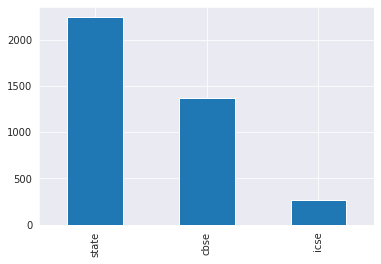

In [34]:

for i in state_board_list:
    df['10board'].replace(i,'state',inplace=True)

cbse_board_list =['cbse', 'central board of secondary education','cbese','cbse board','cbse[gulf zone]','cbse ',
                  'central board of secondary education, new delhi']

for i in cbse_board_list:
    df['10board'].replace(i,'cbse',inplace=True)

icse_board_list=[ 'isc', 'icse', 'isc board', 'isce', 'cicse',
       'isc board , new delhi','icse board , new delhi','icse board']
for i in icse_board_list:
    df['10board'].replace(i,'icse',inplace=True)

df['10board'].replace(0,'n/a',inplace=True)

print(df['10board'].value_counts())

df['10board'].value_counts().plot(kind='bar')

Gender
f    278347.547974
m    287703.829210
Name: Salary, dtype: float64
Gender
f    300000.0
m    300000.0
Name: Salary, dtype: float64



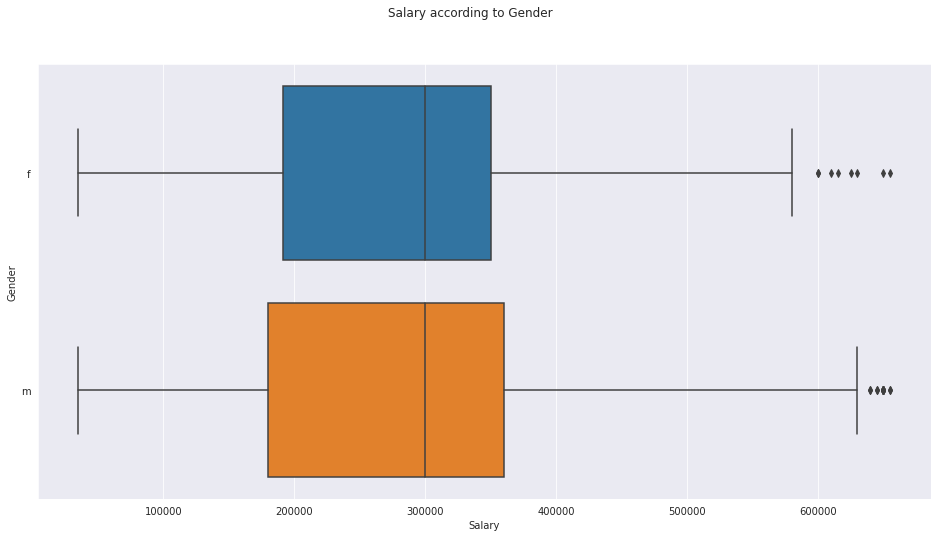

In [35]:
# Does gender affect salaries ?

print(df.groupby('Gender')['Salary'].mean())
print(df.groupby('Gender')['Salary'].median())

print()
plt.figure(figsize=(16,8))
sns.boxplot(x='Salary', y = 'Gender', data=df)
plt.suptitle('Salary according to Gender')
plt.show()

### Observation:
* Mean salary of males is slightly greater than females salary.
* Median salary earned by both the genders are equal

CollegeState
Andhra Pradesh       305874.439462
Assam                365000.000000
Bihar                287000.000000
Chhattisgarh         261666.666667
Delhi                331282.894737
Goa                  450000.000000
Gujarat              228809.523810
Haryana              285285.714286
Himachal Pradesh     320312.500000
Jammu and Kashmir    396428.571429
Jharkhand            387727.272727
Karnataka            315618.131868
Kerala               278030.303030
Madhya Pradesh       295686.813187
Maharashtra          277070.312500
Meghalaya            175000.000000
Orissa               296627.218935
Punjab               279247.311828
Rajasthan            282368.421053
Sikkim               360000.000000
Tamil Nadu           263286.908078
Telangana            284423.076923
Union Territory      186000.000000
Uttar Pradesh        271674.915636
Uttarakhand          284120.370370
West Bengal          268005.181347
Name: Salary, dtype: float64



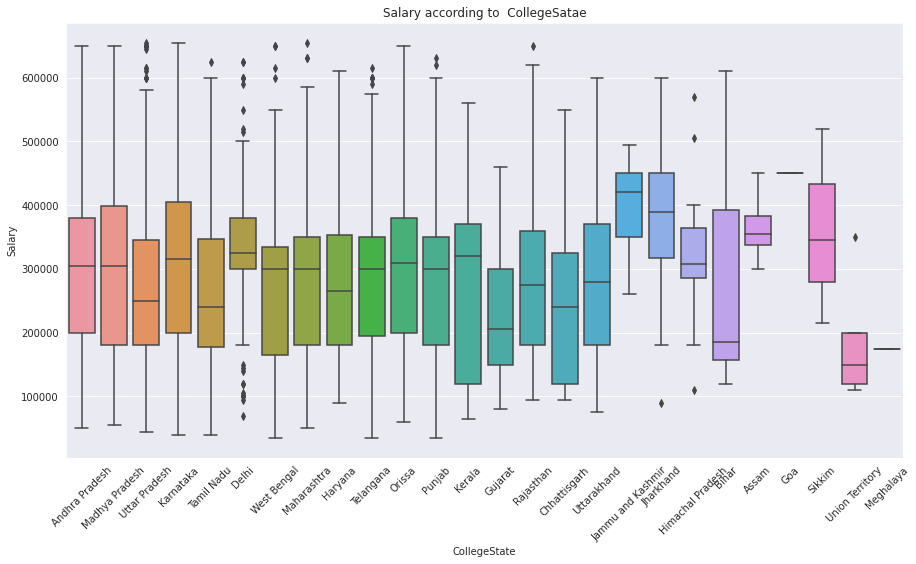

In [36]:
# Does loaction of college affect salaries of Candidates?

print(df.groupby('CollegeState')['Salary'].mean())
print()
plt.figure(figsize = (15, 8))
plt.xticks(rotation = 45)
sns.boxplot(x = 'CollegeState', y = 'Salary', data = df)
plt.title('Salary according to  CollegeSatae')
plt.show()

Degree
B.Tech/B.E.      287995.005549
M.Sc. (Tech.)    320000.000000
M.Tech./M.E.     294270.833333
MCA              244276.595745
Name: Salary, dtype: float64



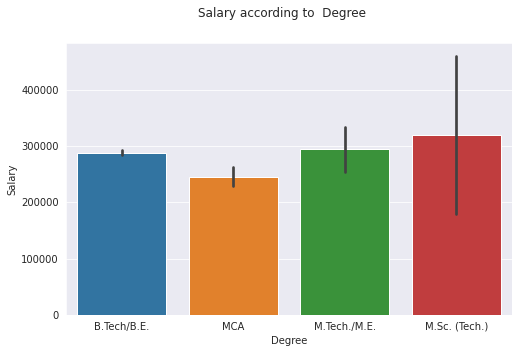

In [37]:
# Does degree awarded affect salaries of Candidates?

print(df.groupby('Degree')['Salary'].mean())

print()

plt.figure(figsize = (8, 5))
sns.barplot(x = 'Degree', y = 'Salary', data = df)
plt.suptitle('Salary according to  Degree')
plt.show()

Specialization
CS       288499.550764
EC       282517.374517
other    277293.478261
Name: Salary, dtype: float64



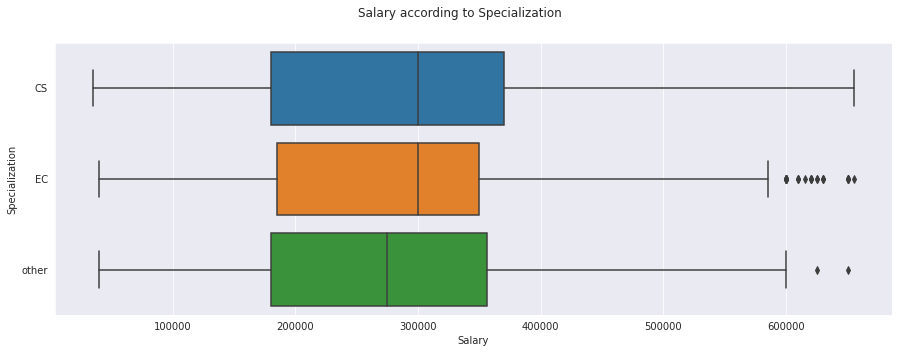

In [38]:
# Does specialization affect salary ?

print(df.groupby('Specialization')['Salary'].mean())

print()

plt.figure(figsize=(15,5))
sns.boxplot(x='Salary', y = 'Specialization', data=df)
plt.suptitle('Salary according to Specialization')
plt.show()

### Observation:
* The mean salary of other depts is higher than salary of candidates having specialization in CS and EC.

CollegeTier
1    368288.973384
2    279438.499724
Name: Salary, dtype: float64



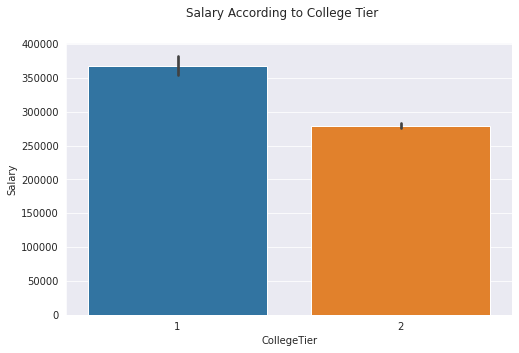

In [39]:
print(df.groupby('CollegeTier')['Salary'].mean())

print()

plt.figure(figsize=(8,5))
sns.barplot(x = 'CollegeTier',y='Salary',data=df)
plt.suptitle('Salary According to College Tier')
plt.show()

### Observation:
* Salary of students from Tier1 college is high.

10board
cbse     295215.014577
icse     306107.011070
state    276987.533393
Name: Salary, dtype: float64



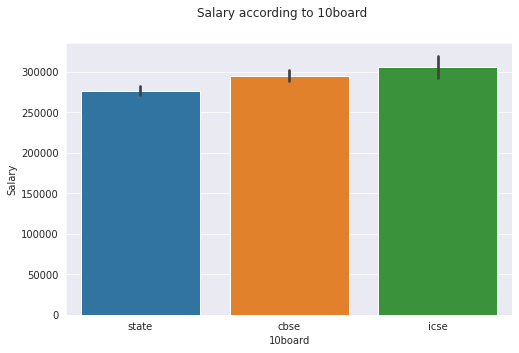

In [40]:
print(df.groupby('10board')['Salary'].mean())

print()

plt.figure(figsize=(8,5))
sns.barplot(x = '10board',y='Salary',data=df)
plt.suptitle('Salary according to 10board')
plt.show()

### Observation:
* Salary of 10board students having board other than state,cbse,icse boards is higher.

12board
cbse     304777.256741
icse     316029.411765
state    266482.364630
Name: Salary, dtype: float64



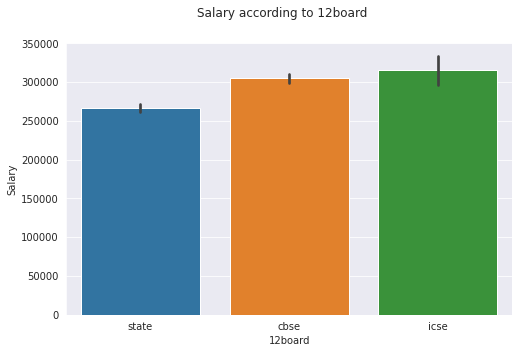

In [41]:
print(df.groupby('12board')['Salary'].mean())

print()

plt.figure(figsize=(8,5))
sns.barplot(x = '12board',y='Salary',data=df)
plt.suptitle('Salary according to 12board')
plt.show()

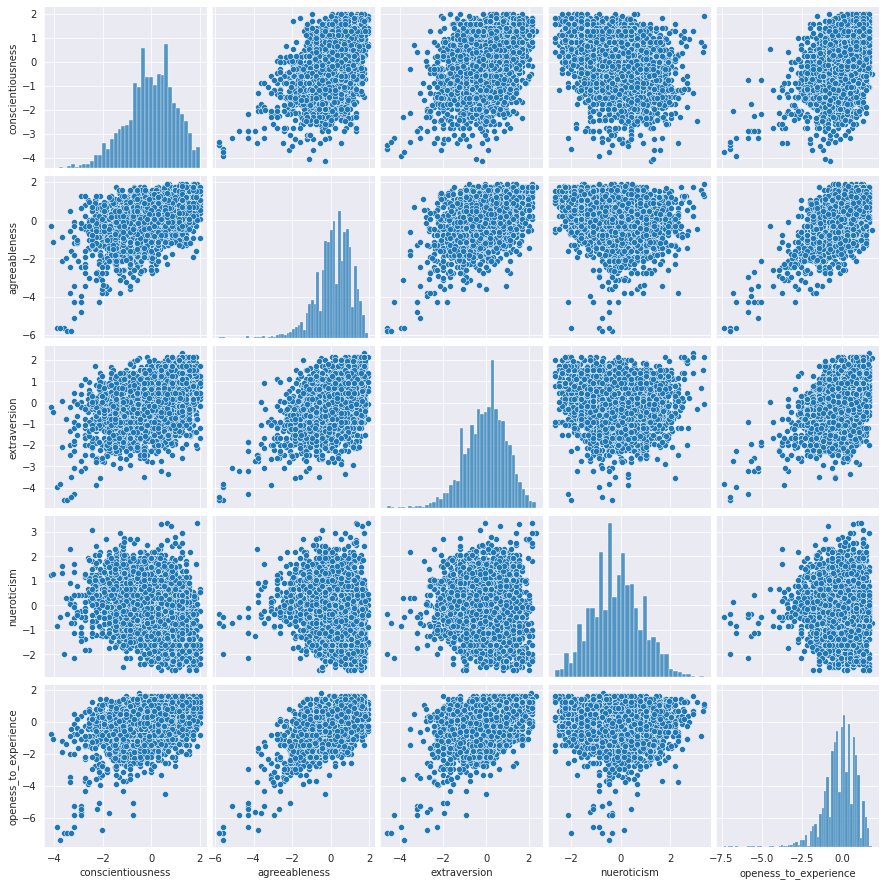

In [42]:
personality_scores=['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']


sns.pairplot(df, vars = personality_scores)
plt.show()

## Correlation of personality scores

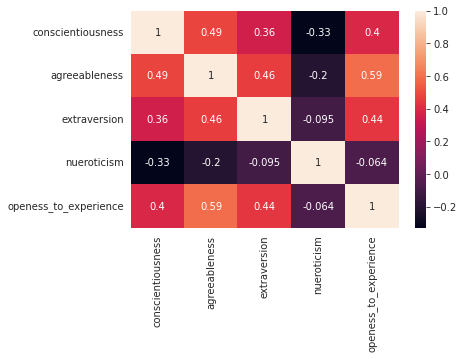

In [43]:
personality = df[['conscientiousness',
                'agreeableness',
                'extraversion',
                'nueroticism',
                'openess_to_experience']]
corrMatrix2 = personality.corr()
sns.heatmap(corrMatrix2, annot=True)

## Correlation of Academic scores

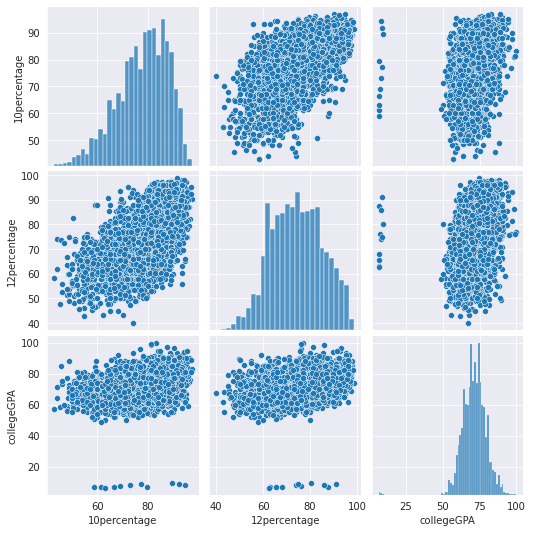

In [44]:
academic_performance = ['10percentage', '12percentage', 'collegeGPA']

sns.pairplot(df, vars = academic_performance)
plt.show()

## Correlation of 10th percentage , 12th percentage , college GPA and Salary

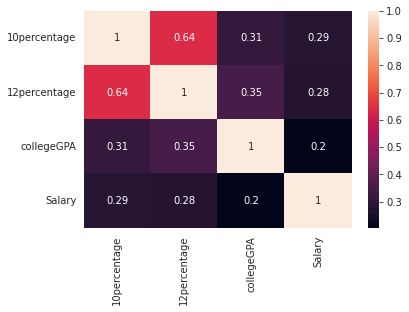

In [45]:
d = df[['10percentage',
                   '12percentage',
                   'collegeGPA','Salary']]
corrMatrix1 = d.corr()
sns.heatmap(corrMatrix1, annot=True)

## Correlation of Standard Test Scores

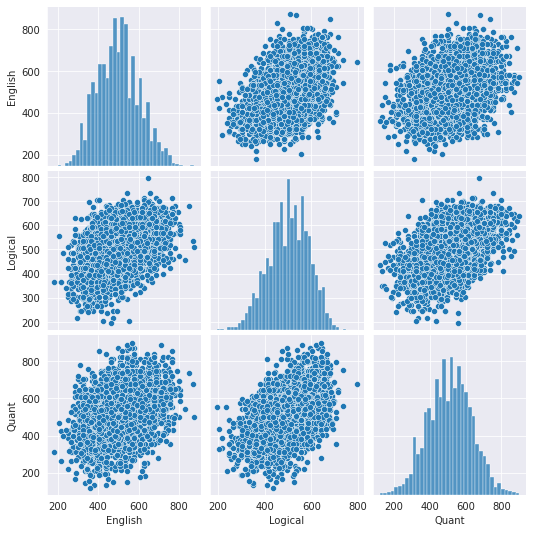

In [46]:
std_test_scores = ['English', 'Logical', 'Quant']
sns.pairplot(df, vars = std_test_scores)
plt.show()


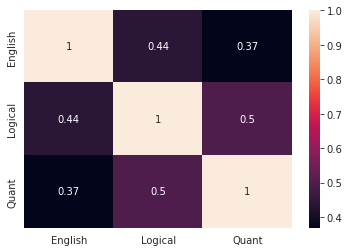

In [47]:
std_test = df[['English',
                   'Logical',
                   'Quant']]
corrMatrix3 = std_test.corr()
sns.heatmap(corrMatrix3, annot=True)

In [48]:
categorical_features=['Specialization', 'Gender', 'Degree','12board','10board','CollegeTier','CollegeCityTier']


for i in categorical_features:
    unique = len(df[i].unique())
    print("{}: {}".format(i, unique))

Specialization: 3
Gender: 2
Degree: 4
12board: 3
10board: 3
CollegeTier: 2
CollegeCityTier: 2


In [49]:
df1 = pd.get_dummies(df, columns = categorical_features )

In [50]:
df1

,Salary,DOJ,DOL,Designation,JobCity,DOB,10percentage,12graduation,12percentage,collegeGPA,...,12board_cbse,12board_icse,12board_state,10board_cbse,10board_icse,10board_state,CollegeTier_1,CollegeTier_2,CollegeCityTier_0,CollegeCityTier_1
0,420000,2012-06-01,present,senior quality engineer,Bangalore,1990-02-19,84.30,2007,95.80,78.00,...,0,0,1,0,0,1,0,1,1,0
1,500000,2013-09-01,present,assistant manager,Indore,1989-10-04,85.40,2007,85.00,70.06,...,1,0,0,1,0,0,0,1,1,0
2,325000,2014-06-01,present,systems engineer,Chennai,1992-08-03,85.00,2010,68.20,70.00,...,1,0,0,1,0,0,0,1,1,0
4,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,1991-02-27,78.00,2008,76.80,73.90,...,1,0,0,1,0,0,0,1,1,0
5,300000,2014-06-01,present,system engineer,Hyderabad,1992-07-02,89.92,2010,87.00,76.32,...,0,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,1987-04-15,52.09,2006,55.50,61.50,...,1,0,0,1,0,0,0,1,1,0
3994,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,1992-08-27,90.00,2009,93.00,77.30,...,0,0,1,0,0,1,0,1,0,1
3995,320000,2013-07-01,present,associate software engineer,Bangalore,1991-07-03,81.86,2008,65.50,70.00,...,0,0,1,0,0,1,0,1,1,0
3996,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,1992-03-20,78.72,2010,69.88,70.42,...,0,0,1,0,0,1,0,1,0,1


In [51]:
df1.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'DOB', '10percentage',
       '12graduation', '12percentage', 'collegeGPA', 'CollegeState',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Designations', 'Specialization_CS',
       'Specialization_EC', 'Specialization_other', 'Gender_f', 'Gender_m',
       'Degree_B.Tech/B.E.', 'Degree_M.Sc. (Tech.)', 'Degree_M.Tech./M.E.',
       'Degree_MCA', '12board_cbse', '12board_icse', '12board_state',
       '10board_cbse', '10board_icse', '10board_state', 'CollegeTier_1',
       'CollegeTier_2', 'CollegeCityTier_0', 'CollegeCityTier_1'],
      dtype='object')

## Conclusion:
* We have done EDA on Aspiring Mind Employment Outcome 2015 (AMEO) dataset.
* We have done univariate analysis,bivariate analysis with some interesting observations.
* Mostly employees got there starting package of Rs 300000.
* Only ~24% Female candidates persued graduation.
* The mean salary of other depts is higher than salary of candidates having specialization in CS and EC.
* We created dummy variables 